# Import thư viện

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Đọc dữ liệu

In [2]:
df = pd.read_csv('../dataset/book_data.csv')
df.head()

,product_id,title,authors,original_price,current_price,quantity,category,n_review,avg_rating,pages,manufacturer,cover_link
0,74021317,Cây Cam Ngọt Của Tôi,José Mauro de Vasconcelos,108000,64800,53075.0,Tiểu Thuyết,11481,5.0,244,Nhà Xuất Bản Hội Nhà Văn,https://salt.tikicdn.com/ts/product/5e/18/24/2...
1,74021317,Cây Cam Ngọt Của Tôi,José Mauro de Vasconcelos,108000,64800,53075.0,Tiểu Thuyết,11481,5.0,244,Nhà Xuất Bản Hội Nhà Văn,https://salt.tikicdn.com/ts/product/5e/18/24/2...
2,184466860,Hành Tinh Của Một Kẻ Nghĩ Nhiều,Nguyễn Đoàn Minh Thư,86000,59900,7929.0,Sách tư duy - Kỹ năng sống,780,4.8,184,Nhà Xuất Bản Thế Giới,https://salt.tikicdn.com/ts/product/d7/99/24/1...
3,73787185,Những Tù Nhân Của Địa Lý,Tim Marshall,210000,126000,17896.0,Lĩnh vực khác,3623,4.8,430,Nhà Xuất Bản Hội Nhà Văn,https://salt.tikicdn.com/ts/product/8d/96/9e/c...
4,52789367,Nhà Giả Kim (Tái Bản 2020),Paulo Coelho,79000,47400,24668.0,Tác phẩm kinh điển,5131,5.0,228,Nhà Xuất Bản Hà Nội,https://salt.tikicdn.com/ts/product/45/3b/fc/a...


# Khám phá và tiền xử lý dữ liệu

## Ý nghĩa của các dòng và các cột

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1796 entries, 0 to 1795
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      1796 non-null   int64  
 1   title           1796 non-null   object 
 2   authors         1653 non-null   object 
 3   original_price  1796 non-null   int64  
 4   current_price   1796 non-null   int64  
 5   quantity        1751 non-null   float64
 6   category        1796 non-null   object 
 7   n_review        1796 non-null   int64  
 8   avg_rating      1796 non-null   float64
 9   pages           1546 non-null   object 
 10  manufacturer    1523 non-null   object 
 11  cover_link      1796 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 168.5+ KB


Dữ liệu có 1796 dòng và 12 cột

Mỗi dòng dữ liệu là thông tin về một quyển sách được bán trên sàn thương mại điện tử Tiki Việt Nam.

Ý nghĩa của các cột:
- product_id: mã sản phẩm
- title: tên sách
- authors: tác giả
- original_price: giá gốc
- current_price: giá hiện tại
- quantity: số lượng
- category: phân loại
- n_review: số lượt đánh giá
- avg_rating: điểm đánh giá trung bình
- pages: số trang
- manufacturer: nhà sản xuất
- cover_link: đường dẫn đến ảnh trang bìa

Cột cover_link không mang ý nghĩa phân tích nên ta xóa cột này đi.

In [4]:
df = df.drop(columns=['cover_link'])
df.head()

,product_id,title,authors,original_price,current_price,quantity,category,n_review,avg_rating,pages,manufacturer
0,74021317,Cây Cam Ngọt Của Tôi,José Mauro de Vasconcelos,108000,64800,53075.0,Tiểu Thuyết,11481,5.0,244,Nhà Xuất Bản Hội Nhà Văn
1,74021317,Cây Cam Ngọt Của Tôi,José Mauro de Vasconcelos,108000,64800,53075.0,Tiểu Thuyết,11481,5.0,244,Nhà Xuất Bản Hội Nhà Văn
2,184466860,Hành Tinh Của Một Kẻ Nghĩ Nhiều,Nguyễn Đoàn Minh Thư,86000,59900,7929.0,Sách tư duy - Kỹ năng sống,780,4.8,184,Nhà Xuất Bản Thế Giới
3,73787185,Những Tù Nhân Của Địa Lý,Tim Marshall,210000,126000,17896.0,Lĩnh vực khác,3623,4.8,430,Nhà Xuất Bản Hội Nhà Văn
4,52789367,Nhà Giả Kim (Tái Bản 2020),Paulo Coelho,79000,47400,24668.0,Tác phẩm kinh điển,5131,5.0,228,Nhà Xuất Bản Hà Nội


## Các dòng bị trùng lặp

In [5]:
num_duplicated = df.duplicated().sum()
print(f'Số dòng dữ liệu trùng lặp là {num_duplicated}.')

Số dòng dữ liệu trùng lặp là 19.


Ta tiến hành xóa các dòng bị trùng lặp

In [6]:
df = df.drop_duplicates()

In [7]:
num_duplicated = df.duplicated().sum()
print(f'Số dòng dữ liệu trùng lặp là {num_duplicated}.')
print(f'Số dòng dữ liệu còn lại là {df.shape[0]}')

Số dòng dữ liệu trùng lặp là 0.
Số dòng dữ liệu còn lại là 1777


## Kiểu dữ liệu của cột chưa phù hợp

In [8]:
df.dtypes

product_id          int64
title              object
authors            object
original_price      int64
current_price       int64
quantity          float64
category           object
n_review            int64
avg_rating        float64
pages              object
manufacturer       object
dtype: object

In [9]:
# df.title = df.title.astype("category")
# df.authors = df.authors.astype("category")
# df.category = df.category.astype("category")
# df.manufacturer = df.manufacturer.astype("category")

Cột quantity là số lượng quyển sách phải ở kiểu int64, ta sẽ thực hiện ép kiểu sau các thao tác như điền dữ liệu bị thiếu.

Cột pages là số trang nhưng lại có kiểu là object do đó ta tiến hình ép kiểu của pages thành float64 để thuận tiện cho các thao tác sau. Sau khi đã hoàn thành các thao tác xong ta ép về kiểu int64.

In [10]:
df['pages'] = pd.to_numeric(df['pages'], errors='coerce')
df['pages']

0       244.0
2       184.0
3       430.0
4       228.0
5       304.0
        ...  
1791      NaN
1792    236.0
1793    296.0
1794    436.0
1795    256.0
Name: pages, Length: 1777, dtype: float64

In [11]:
df['pages'] = df['pages'].astype('float64')

## Kiểm tra các cột dữ liệu bị thiếu

In [12]:
df.isnull().sum()

product_id          0
title               0
authors           140
original_price      0
current_price       0
quantity           45
category            0
n_review            0
avg_rating          0
pages             251
manufacturer      265
dtype: int64

Các cột có dữ liệu bị thiếu là: authors, quantity, pages và manufacturer

## Các cột dữ liệu phân loại

In [13]:
categorical_cols = df.select_dtypes(include = 'object').columns.tolist()
print(f'Các cột có kiểu dữ liệu categorical: {categorical_cols}')

Các cột có kiểu dữ liệu categorical: ['title', 'authors', 'category', 'manufacturer']


### Cột title

Ta xóa các quyển sách có tên trùng nhau.

In [14]:
df = df.drop_duplicates(subset=['title'])

### Cột authors

In [15]:
print(f'Số lượng các tác giả khác nhau là: {df.authors.nunique()}')
df.authors.value_counts()

Số lượng các tác giả khác nhau là: 1083


Nguyễn Nhật Ánh    24
Higashino Keigo    20
.                  18
Thích Nhất Hạnh    16
Haruki Murakami    15
                   ..
Urako Kanamori      1
Cổ Viên             1
Robert Winston      1
Yongchul Kwon       1
John C. Maxwell     1
Name: authors, Length: 1083, dtype: int64

Có 18 quyển sách có tác già là ".", ta tiến hành thay thế các dòng này thành "Không rõ"

In [16]:
df.loc[df.authors == '.' , 'authors'] = "Không rõ"

In [17]:
print(f'Số lượng các tác giả khác nhau là: {df.authors.nunique()}')
df.authors.value_counts()

Số lượng các tác giả khác nhau là: 1083


Nguyễn Nhật Ánh    24
Higashino Keigo    20
Không rõ           18
Thích Nhất Hạnh    16
Haruki Murakami    15
                   ..
Urako Kanamori      1
Cổ Viên             1
Robert Winston      1
Yongchul Kwon       1
John C. Maxwell     1
Name: authors, Length: 1083, dtype: int64

In [18]:
# Tính phần trăm giá trị thiếu trong cột 'authors'
missing_percentage = df['authors'].isna().mean() * 100

# In kết quả
print(f"Phần trăm giá trị thiếu trong cột 'authors': {missing_percentage:.2f}%")

Phần trăm giá trị thiếu trong cột 'authors': 7.80%


In [19]:
df.authors = df.authors.fillna("Không rõ")

In [20]:
# Tính phần trăm giá trị thiếu trong cột 'authors'
missing_percentage = df['authors'].isna().mean() * 100
# In kết quả
print(f"Phần trăm giá trị thiếu trong cột 'authors': {missing_percentage:.2f}%")

Phần trăm giá trị thiếu trong cột 'authors': 0.00%


### Cột category

In [21]:
print(f'Số lượng các thể loại khác nhau là: {df.category.nunique()}')
category_counts = df.category.value_counts()
category_counts 

Số lượng các thể loại khác nhau là: 354


Sách tư duy - Kỹ năng sống                 292
Tiểu Thuyết                                133
Truyện ngắn - Tản văn - Tạp Văn            109
Sách nghệ thuật sống đẹp                    58
Sách kỹ năng làm việc                       55
                                          ... 
Shaman King - Tập 19                         1
Blue Period - Tập 07                         1
Komi - Nữ Thần Sợ Giao Tiếp - Tập 14         1
Bên Rặng Tuyết Sơn (Tái Bản)                 1
Kaguya-Sama: Cuộc Chiến Tỏ Tình - Tập 3      1
Name: category, Length: 354, dtype: int64

Có quá nhiều thể loại, đăc biệt có những thể loại chỉ có 1 quyển sách và ta thấy rằng nó giống tên của quyển sách hơn là thể loại. Do đó ta chuyển các category này thành Khác

In [22]:
categories_only_one = category_counts[category_counts == 1].index
categories_only_one

Index(['Thiền Tập Cho Người Bận Rộn (Tbl12)', 'Blue Flag - Tập 3',
       'Đọc Hiểu Kết Quả Xét Nghiệm Máu  (Tái Bản)',
       'Dưới Hiên Nhà Bà Già Đọc Boyslove - 1', 'Thực Hành Thiền Định',
       '666 Satan Tập 4 [Tặng Kèm Bookmark Nhân Vật]',
       'Vivre Card - Thẻ Dữ Liệu Nhân Vật One Piece Booster Pack - Thợ Đóng Tàu Hàng Đầu Thế Giới! Galleyla-Company!!',
       'Gửi Em, Người Bất Tử - Tập 2 (Tái Bản 2022)', 'Shaman King - Tập 18',
       'Doraemon Movie Story: Nobita Và Viện Bảo Tàng Bảo Bối',
       ...
       'Ăn Uống Đúng Cách: Bộ Quy Tắc Ẩm Thực Lành Mạnh',
       'Những Chàng Trai Ở Lộc Phong Quán – Tập 11', 'Đi Hát Karaoke Đi',
       'Vua Sáng Chế Tập 22', 'Bá Tước Tiểu Thư - Tập 5',
       'Shaman King - Tập 19', 'Blue Period - Tập 07',
       'Komi - Nữ Thần Sợ Giao Tiếp - Tập 14', 'Bên Rặng Tuyết Sơn (Tái Bản)',
       'Kaguya-Sama: Cuộc Chiến Tỏ Tình - Tập 3'],
      dtype='object', length=285)

In [23]:
df['category'] = df['category'].apply(lambda x: 'Khác' if x in categories_only_one else x)

# In kết quả
print(f'Số lượng các thể loại khác nhau là: {df.category.nunique()}')
print(df['category'].value_counts())

Số lượng các thể loại khác nhau là: 70
Sách tư duy - Kỹ năng sống         292
Khác                               285
Tiểu Thuyết                        133
Truyện ngắn - Tản văn - Tạp Văn    109
Sách nghệ thuật sống đẹp            58
                                  ... 
Truyện kiếm hiệp                     2
Sách Thai Giáo                       2
Sách tài chính, kế toán              2
Sách Học Tiếng Nhật                  2
Lý Luận Chính Trị                    2
Name: category, Length: 70, dtype: int64


### Cột manufacturer

In [24]:
print(f'Số lượng các nhà xuất bản khác nhau là: {df.manufacturer.nunique()}')
df.manufacturer.value_counts()

Số lượng các nhà xuất bản khác nhau là: 41


Nhà Xuất Bản Thế Giới                            247
NXB Trẻ                                          143
Nhà Xuất Bản Hà Nội                              128
Nhà Xuất Bản Dân Trí                             126
Nhà Xuất Bản Kim Đồng                            113
Nhà Xuất Bản Hội Nhà Văn                         111
Nhà Xuất Bản Thanh Niên                           97
Nhà Xuất Bản Tổng hợp TP.HCM                      91
Nhà Xuất Bản Lao Động                             89
Nhà Xuất Bản Văn Học                              77
Nhà Xuất Bản Hồng Đức                             56
Nhà Xuất Bản Công Thương                          46
Nhà Xuất Bản Phụ Nữ Việt Nam                      38
Nhà Xuất Bản Phụ Nữ                               30
Nhà Xuất Bản Đà Nẵng                              17
Nhà Xuất Bản Đại Học Quốc Gia Hà Nội              13
Nhà Xuất Bản Mỹ Thuật                              8
Nhà Xuất Bản Tri Thức                              7
Nhà Xuất Bản Lao Động Xã Hội                  

Có những giá trị có cách thể hiện khác nhau:
- Nhà Xuất Bản Hồng Đức & hong duc
- Nhà Xuất Bản Dân Trí & NXB Dân Trí
- Nhà Xuất Bản Đại Học Quốc Gia Hà Nội & ĐHQG Hà Nội

In [25]:
def handle_manufactuner(manufactuner):
    if manufactuner == "hong duc":
        return "Nhà Xuất Bản Hồng Đức"
    elif manufactuner == "NXB Dân Trí":
        return "Nhà Xuất Bản Dân Trí"
    elif manufactuner == "ĐHQG Hà Nội":
        return "Nhà Xuất Bản Đại Học Quốc Gia Hà Nội"
    else:
        return manufactuner
    
df.manufacturer = df.manufacturer.apply(lambda manufacturer: handle_manufactuner(manufacturer))

In [26]:
# Tính phần trăm giá trị thiếu
missing_manufacturer = df['manufacturer'].isna().mean() * 100
print(f"Phần trăm giá trị thiếu trong cột 'manufacturer': {missing_manufacturer:.2f}%")

Phần trăm giá trị thiếu trong cột 'manufacturer': 14.98%


Xử lý các giá trị null bằng cách điền vào Unknown

In [27]:
df.manufacturer = df.manufacturer.fillna("Không rõ")

In [28]:
# Tính phần trăm giá trị thiếu
missing_manufacturer = df['manufacturer'].isna().mean() * 100
print(f"Phần trăm giá trị thiếu trong cột 'manufacturer': {missing_manufacturer:.2f}%")

Phần trăm giá trị thiếu trong cột 'manufacturer': 0.00%


In [29]:
print(f'Số lượng các nhà xuất bản khác nhau là: {df.manufacturer.nunique()}')
df.manufacturer.value_counts()

Số lượng các nhà xuất bản khác nhau là: 39


Không rõ                                         265
Nhà Xuất Bản Thế Giới                            247
NXB Trẻ                                          143
Nhà Xuất Bản Dân Trí                             132
Nhà Xuất Bản Hà Nội                              128
Nhà Xuất Bản Kim Đồng                            113
Nhà Xuất Bản Hội Nhà Văn                         111
Nhà Xuất Bản Thanh Niên                           97
Nhà Xuất Bản Tổng hợp TP.HCM                      91
Nhà Xuất Bản Lao Động                             89
Nhà Xuất Bản Văn Học                              77
Nhà Xuất Bản Hồng Đức                             59
Nhà Xuất Bản Công Thương                          46
Nhà Xuất Bản Phụ Nữ Việt Nam                      38
Nhà Xuất Bản Phụ Nữ                               30
Nhà Xuất Bản Đà Nẵng                              17
Nhà Xuất Bản Đại Học Quốc Gia Hà Nội              14
Nhà Xuất Bản Mỹ Thuật                              8
Nhà Xuất Bản Tri Thức                         

In [30]:
df.head()

,product_id,title,authors,original_price,current_price,quantity,category,n_review,avg_rating,pages,manufacturer
0,74021317,Cây Cam Ngọt Của Tôi,José Mauro de Vasconcelos,108000,64800,53075.0,Tiểu Thuyết,11481,5.0,244.0,Nhà Xuất Bản Hội Nhà Văn
2,184466860,Hành Tinh Của Một Kẻ Nghĩ Nhiều,Nguyễn Đoàn Minh Thư,86000,59900,7929.0,Sách tư duy - Kỹ năng sống,780,4.8,184.0,Nhà Xuất Bản Thế Giới
3,73787185,Những Tù Nhân Của Địa Lý,Tim Marshall,210000,126000,17896.0,Lĩnh vực khác,3623,4.8,430.0,Nhà Xuất Bản Hội Nhà Văn
4,52789367,Nhà Giả Kim (Tái Bản 2020),Paulo Coelho,79000,47400,24668.0,Tác phẩm kinh điển,5131,5.0,228.0,Nhà Xuất Bản Hà Nội
5,147920903,Một Thoáng Ta Rực Rỡ Ở Nhân Gian,Không rõ,135000,81000,10000.0,Tiểu Thuyết,1636,4.8,304.0,Nhà Xuất Bản Hội Nhà Văn


## Các cột dữ liệu số

In [31]:
# Lấy danh sách tên cột dữ liệu dạng numeric
numeric_cols = df.select_dtypes(include = ['int64', 'float64']).columns.tolist()
print(f'Các cột có kiểu dữ liệu số: {numeric_cols}')

Các cột có kiểu dữ liệu số: ['product_id', 'original_price', 'current_price', 'quantity', 'n_review', 'avg_rating', 'pages']


### Xử lý giá trị thiếu

In [32]:
missing_dict = {}
for col in numeric_cols:
  missing = df[col].isna().mean() *100
  missing_dict[col] = missing
  print(f'Phần trăm giá trị còn thiếu của {col} là {missing}%')

Phần trăm giá trị còn thiếu của product_id là 0.0%
Phần trăm giá trị còn thiếu của original_price là 0.0%
Phần trăm giá trị còn thiếu của current_price là 0.0%
Phần trăm giá trị còn thiếu của quantity là 2.317693612210288%
Phần trăm giá trị còn thiếu của n_review là 0.0%
Phần trăm giá trị còn thiếu của avg_rating là 0.0%
Phần trăm giá trị còn thiếu của pages là 13.962690785754663%


Xử lý missing value bằng cách điền vào trung bình theo các nhóm phân loại.

In [33]:
# Tính trung bình của 'pages' theo từng 'category'
df['pages'] = df.groupby('category')['pages'].transform(lambda x: x.fillna(x.mean()))
df['pages'] = df['pages'].round().astype('int64')
df

,product_id,title,authors,original_price,current_price,quantity,category,n_review,avg_rating,pages,manufacturer
0,74021317,Cây Cam Ngọt Của Tôi,José Mauro de Vasconcelos,108000,64800,53075.0,Tiểu Thuyết,11481,5.0,244,Nhà Xuất Bản Hội Nhà Văn
2,184466860,Hành Tinh Của Một Kẻ Nghĩ Nhiều,Nguyễn Đoàn Minh Thư,86000,59900,7929.0,Sách tư duy - Kỹ năng sống,780,4.8,184,Nhà Xuất Bản Thế Giới
3,73787185,Những Tù Nhân Của Địa Lý,Tim Marshall,210000,126000,17896.0,Lĩnh vực khác,3623,4.8,430,Nhà Xuất Bản Hội Nhà Văn
4,52789367,Nhà Giả Kim (Tái Bản 2020),Paulo Coelho,79000,47400,24668.0,Tác phẩm kinh điển,5131,5.0,228,Nhà Xuất Bản Hà Nội
5,147920903,Một Thoáng Ta Rực Rỡ Ở Nhân Gian,Không rõ,135000,81000,10000.0,Tiểu Thuyết,1636,4.8,304,Nhà Xuất Bản Hội Nhà Văn
...,...,...,...,...,...,...,...,...,...,...,...
1791,192949122,7 Thói Quen Hiệu Quả - The 7 Habits Of Highly ...,Stephen R Covey,250000,191200,76.0,Sách tư duy - Kỹ năng sống,7,5.0,318,Nhà Xuất Bản Tổng hợp TP.HCM
1792,157579054,Các Vấn Đề Của Triết Học (The Problems Of Phil...,Bertrand Russell,85000,48900,147.0,Triết Học,20,5.0,236,Nhà Xuất Bản Khoa Học Xã Hội
1793,20704715,Để Con Được Chích - Hiểu Hết Về Vắc Xin Và Miễ...,Uyên Bùi,108000,43200,931.0,Sách Làm Cha Mẹ,47,4.6,296,Không rõ
1794,131144753,Nhà Lãnh Đạo 360 Độ (Tái Bản),John C. Maxwell,179000,107500,378.0,"Sách quản trị, lãnh đạo",33,5.0,436,Nhà Xuất Bản Lao Động


In [34]:
# Tính trung bình của 'pages' theo từng 'category'
df['quantity'] = df.groupby('category')['quantity'].transform(lambda x: x.fillna(x.mean()))
df['quantity'] = df['quantity'].round().astype('int64')
df

,product_id,title,authors,original_price,current_price,quantity,category,n_review,avg_rating,pages,manufacturer
0,74021317,Cây Cam Ngọt Của Tôi,José Mauro de Vasconcelos,108000,64800,53075,Tiểu Thuyết,11481,5.0,244,Nhà Xuất Bản Hội Nhà Văn
2,184466860,Hành Tinh Của Một Kẻ Nghĩ Nhiều,Nguyễn Đoàn Minh Thư,86000,59900,7929,Sách tư duy - Kỹ năng sống,780,4.8,184,Nhà Xuất Bản Thế Giới
3,73787185,Những Tù Nhân Của Địa Lý,Tim Marshall,210000,126000,17896,Lĩnh vực khác,3623,4.8,430,Nhà Xuất Bản Hội Nhà Văn
4,52789367,Nhà Giả Kim (Tái Bản 2020),Paulo Coelho,79000,47400,24668,Tác phẩm kinh điển,5131,5.0,228,Nhà Xuất Bản Hà Nội
5,147920903,Một Thoáng Ta Rực Rỡ Ở Nhân Gian,Không rõ,135000,81000,10000,Tiểu Thuyết,1636,4.8,304,Nhà Xuất Bản Hội Nhà Văn
...,...,...,...,...,...,...,...,...,...,...,...
1791,192949122,7 Thói Quen Hiệu Quả - The 7 Habits Of Highly ...,Stephen R Covey,250000,191200,76,Sách tư duy - Kỹ năng sống,7,5.0,318,Nhà Xuất Bản Tổng hợp TP.HCM
1792,157579054,Các Vấn Đề Của Triết Học (The Problems Of Phil...,Bertrand Russell,85000,48900,147,Triết Học,20,5.0,236,Nhà Xuất Bản Khoa Học Xã Hội
1793,20704715,Để Con Được Chích - Hiểu Hết Về Vắc Xin Và Miễ...,Uyên Bùi,108000,43200,931,Sách Làm Cha Mẹ,47,4.6,296,Không rõ
1794,131144753,Nhà Lãnh Đạo 360 Độ (Tái Bản),John C. Maxwell,179000,107500,378,"Sách quản trị, lãnh đạo",33,5.0,436,Nhà Xuất Bản Lao Động


### Kiểm tra các khoảng giá trị

In [35]:
numeric_cols.remove('product_id')

In [36]:
statistics = df[numeric_cols].describe()

# Hiển thị các chỉ số thống kê với 2 chữ số thập phân
pd.set_option('display.float_format', '{:,.2f}'.format)

# In kết quả
statistics

,original_price,current_price,quantity,n_review,avg_rating,pages
count,"1,769.00","1,769.00","1,769.00","1,769.00","1,769.00","1,769.00"
mean,"158,490.33","115,127.46","2,803.12",328.48,4.60,437.22
std,"127,187.92","101,848.90","16,789.75",730.62,1.13,"4,561.19"
min,0.00,0.00,1.00,0.00,0.00,10.00
25%,"89,000.00","60,000.00",180.00,16.00,4.80,216.00
50%,"129,000.00","88,800.00",598.00,75.00,4.80,299.00
75%,"189,000.00","136,500.00","2,247.00",303.00,5.00,402.00
max,"1,550,000.00","1,200,000.00","671,121.00","11,481.00",5.00,"192,000.00"


Giá trị 0 ở cột n_review và avg_rating là dễ hiểu bởi có những quyển sách có lượt mua thấp chưa được đánh giá. Ta sẽ tiến hành phân tích sau.
Ta thấy cột original_price và current_price có giá trị 0 khá bất thường. Ta tiến hành kiểm tra.

In [37]:
zero_price = df[(df['original_price'] == 0) | (df['current_price'] == 0)]
zero_price

,product_id,title,authors,original_price,current_price,quantity,category,n_review,avg_rating,pages,manufacturer
968,203875661,( Khóa Học ) IELTS Fighter Target 6.5 Speaking,Không rõ,0,0,56,Sách Học Tiếng Anh,0,0.00,423,Nhà Xuất Bản Thế Giới


Có một dòng có dữ liệu bất thường. Xóa dòng dữ liệu trên

In [38]:
df.drop(index=968, inplace=True)

In [39]:
zero_price = df[(df['original_price'] == 0) | (df['current_price'] == 0)]
zero_price

,product_id,title,authors,original_price,current_price,quantity,category,n_review,avg_rating,pages,manufacturer


In [40]:
statistics = df[numeric_cols].describe()

# Hiển thị các chỉ số thống kê với 2 chữ số thập phân
pd.set_option('display.float_format', '{:,.2f}'.format)

# In kết quả
statistics

,original_price,current_price,quantity,n_review,avg_rating,pages
count,"1,768.00","1,768.00","1,768.00","1,768.00","1,768.00","1,768.00"
mean,"158,579.97","115,192.57","2,804.67",328.67,4.60,437.23
std,"127,167.99","101,840.88","16,794.37",730.78,1.12,"4,562.48"
min,"15,000.00","9,600.00",1.00,0.00,0.00,10.00
25%,"89,000.00","60,000.00",180.00,16.00,4.80,216.00
50%,"129,000.00","88,800.00",601.00,75.00,4.80,298.50
75%,"189,000.00","136,525.00","2,248.00",303.75,5.00,402.00
max,"1,550,000.00","1,200,000.00","671,121.00","11,481.00",5.00,"192,000.00"


Khoảng giá trị của các cột đã khá hợp lý:
- original_price: 15,000 - 1,550,000
- current_price: 9,600 - 1,200,000
- quantity: 1 - 671,121
- n_review: 0 - 11,481
- avg_rating: 0.00 - 5.00
- pages: 10.00 - 192,000

### Kiểm tra các phân phối

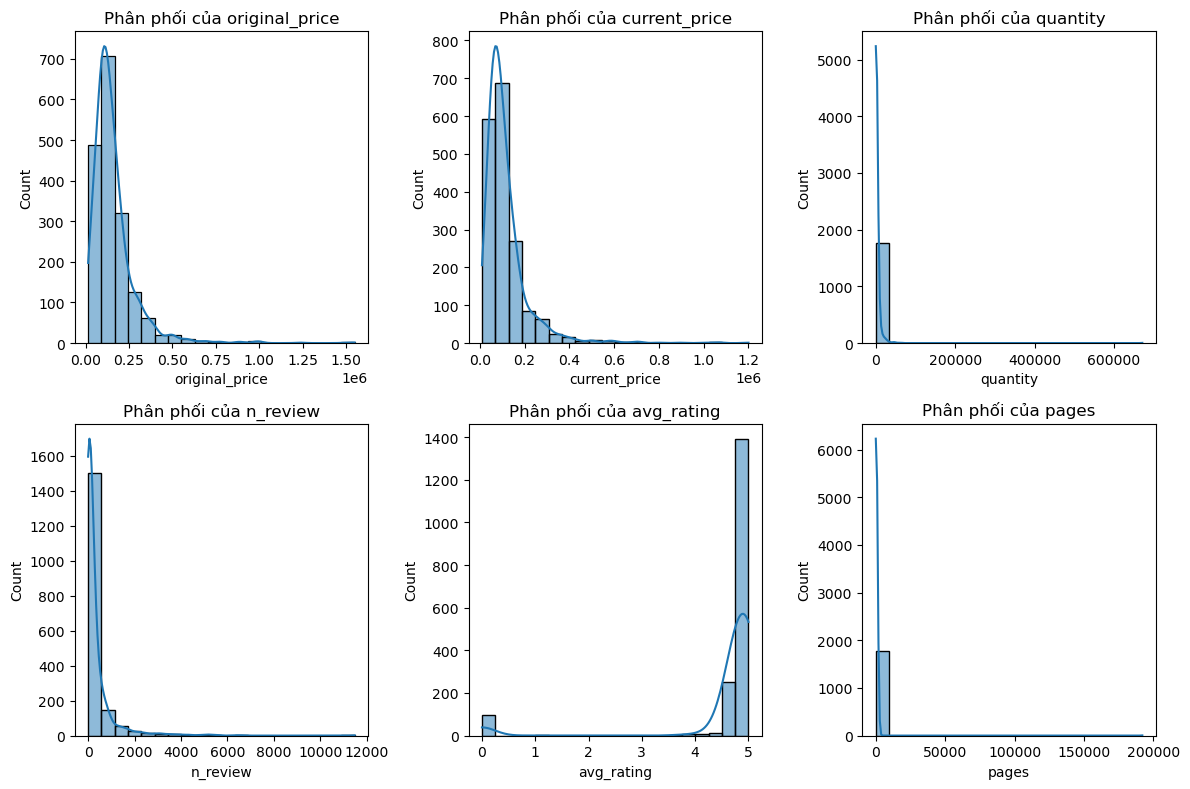

In [41]:
plt.figure(figsize=(12, 8))

# Duyệt qua các cột số và vẽ phân phối
for i, col in enumerate(numeric_cols):
    plt.subplot(2, len(numeric_cols)//2, i+1)
    sns.histplot(df[col], kde=True, bins=20) 
    plt.title(f'Phân phối của {col}')
    plt.tight_layout()

plt.show()

Phân phỗi của các cột không có bất thường. Ta sẽ tiến hành phân tích ở phần sau để rõ hơn.

# Lưu dữ liệu

In [42]:
df.head()

,product_id,title,authors,original_price,current_price,quantity,category,n_review,avg_rating,pages,manufacturer
0,74021317,Cây Cam Ngọt Của Tôi,José Mauro de Vasconcelos,108000,64800,53075,Tiểu Thuyết,11481,5.00,244,Nhà Xuất Bản Hội Nhà Văn
2,184466860,Hành Tinh Của Một Kẻ Nghĩ Nhiều,Nguyễn Đoàn Minh Thư,86000,59900,7929,Sách tư duy - Kỹ năng sống,780,4.80,184,Nhà Xuất Bản Thế Giới
3,73787185,Những Tù Nhân Của Địa Lý,Tim Marshall,210000,126000,17896,Lĩnh vực khác,3623,4.80,430,Nhà Xuất Bản Hội Nhà Văn
4,52789367,Nhà Giả Kim (Tái Bản 2020),Paulo Coelho,79000,47400,24668,Tác phẩm kinh điển,5131,5.00,228,Nhà Xuất Bản Hà Nội
5,147920903,Một Thoáng Ta Rực Rỡ Ở Nhân Gian,Không rõ,135000,81000,10000,Tiểu Thuyết,1636,4.80,304,Nhà Xuất Bản Hội Nhà Văn


In [43]:
df.to_csv('../dataset/book_data_cleaned.csv', index=False)

# Tương quan giữa các thuộc tính

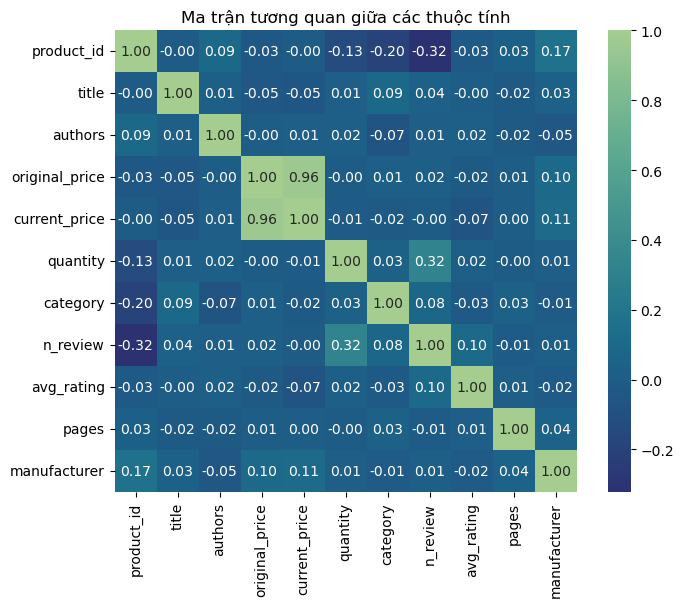

In [44]:
label_encoder = LabelEncoder()

for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column])

correlation_matrix = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='crest_r', square=True)
plt.title('Ma trận tương quan giữa các thuộc tính')
plt.show()